# PHYS 267 - Final project:<br><font color='red'>Global Overview of Pre-Eruptive Magma Chamber Conditions</font>
***

<h2><b><i>Introduction</i></b></h2>


Volcanoes erupt effusively and explosively. Explosive eruptions account for 95% of the human casualties and are therefore of great concern which is the reason why studies are being done to predict whether a next volcanic event will be effisve or explosive. (Popa et al., 2021)


"To a first order, eruptive style is thought to depend dominantly on conduit processes, namely on whether the gas remains trapped in the magma or escapes and outgases during ascent. In the first case, the trapped gas bubbles expand, accelerate and fragment the magma column, releasing the energy required for explosive activity. In the second case, outgassing neutralizes the explosive potential of the magma, resulting in effusive eruptions. However, most volcanoes are known to manifest both effusive and explosive behaviour, sometimes simultaneously, and a clear understanding of the factors that control transitions between effusive and explosive eruptions remains elusive." (Popa et al., 2021)
<br>
<h2><b><i>Difference between explosive and effusive eruptions</i></b></h2>


Explosive eruptions can form pyroclastic flows that sweep down valleys, destroying everything in their path. They also send ash high into the atmosphere, forming plumes. It’s a bit like a bottle of fizzy pop: gas is trapped in the liquid but if you shake the bottle the gas wants to escape. This builds pressure inside the bottle and when you release the pressure by opening the bottle, the gas rushes out of the top carrying some of the liquid with it.

If a magma has low viscosity, gas can escape easily, so when the magma erupts at the surface it forms lava flows. These eruptions are relatively gentle, effusive eruptions. If a magma rises very slowly within the conduit or throat, of the volcano, all the gas can escape. When the magma is viscous (or sticky), it can’t flow when it reaches the surface, so it builds up forming a lava dome. (British Geological Survey, 2023)

<h2><b><i>The dataset</i></b></h2>

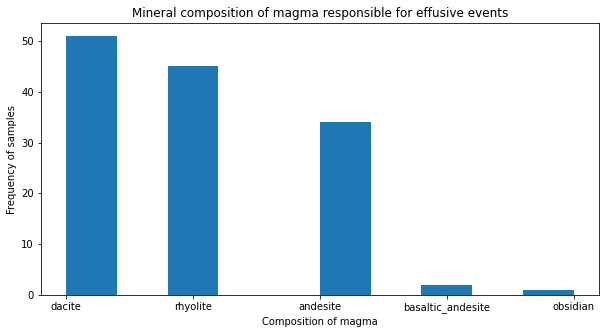

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat

#effusive

effComp = np.genfromtxt("effusive_comp.txt",dtype='str',skip_header=1)
effWater = np.loadtxt("effusive_properties.txt",usecols=0)
effCrystallanity = np.loadtxt("effusive_properties.txt",usecols=1)
effStorage_temp = np.genfromtxt("effusive_properties.txt",dtype='float',skip_footer=1,usecols=2)
effSiO2 = np.loadtxt("effusive_chem.txt",skiprows=1,usecols=0)
effTiO2 = np.loadtxt("effusive_chem.txt",skiprows=1,usecols=1)
effAl2O3 = np.loadtxt("effusive_chem.txt",skiprows=1,usecols=2)
effFeO = np.loadtxt("effusive_chem.txt",skiprows=1,usecols=3)
effMgO = np.loadtxt("effusive_chem.txt",skiprows=1,usecols=4)
effCaO = np.loadtxt("effusive_chem.txt",skiprows=1,usecols=5)
effNa2O = np.loadtxt("effusive_chem.txt",skiprows=1,usecols=6)
effK2O = np.loadtxt("effusive_chem.txt",skiprows=1,usecols=7)

fig, ax = plt.subplots(figsize=(10,5))

ax.hist(effComp)
ax.set_title("Mineral composition of magma responsible for effusive events")
ax.set_xlabel("Composition of magma")
ax.set_ylabel("Frequency of samples")
plt.show()

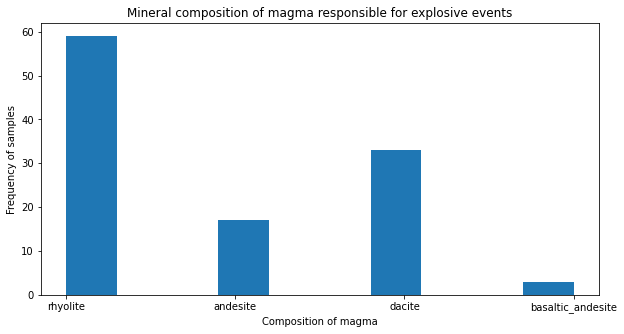

In [2]:
#explosive

expComp = np.genfromtxt("explosive_comp.txt",dtype='str',skip_header=1)
expWater = np.loadtxt("explosive_properties.txt",skiprows=1,usecols=0)
expCrystallanity = np.loadtxt("explosive_properties.txt",skiprows=1,usecols=1)
expStorage_temp = np.genfromtxt("explosive_properties.txt",dtype='float',skip_header=1,skip_footer=7,usecols=2)
expSiO2 = np.loadtxt("explosive_chem.txt",skiprows=1,usecols=0)
expTiO2 = np.loadtxt("explosive_chem.txt",skiprows=1,usecols=1)
expAl2O3 = np.loadtxt("explosive_chem.txt",skiprows=1,usecols=2)
expFeO = np.loadtxt("explosive_chem.txt",skiprows=1,usecols=3)
expMgO = np.loadtxt("explosive_chem.txt",skiprows=1,usecols=4)
expCaO = np.loadtxt("explosive_chem.txt",skiprows=1,usecols=5)
expNa2O = np.loadtxt("explosive_chem.txt",skiprows=1,usecols=6)
expK2O = np.loadtxt("explosive_chem.txt",skiprows=1,usecols=7)

fig, ax = plt.subplots(figsize=(10,5))

ax.hist(expComp)
ax.set_title("Mineral composition of magma responsible for explosive events")
ax.set_xlabel("Composition of magma")
ax.set_ylabel("Frequency of samples")
plt.show()

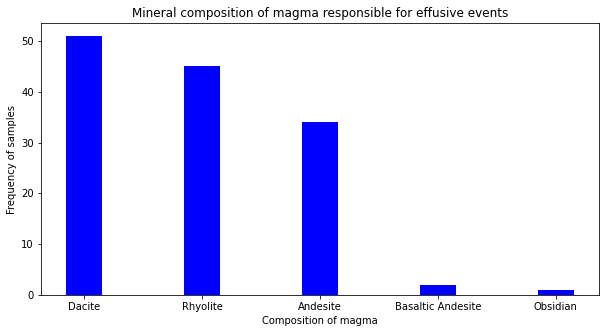

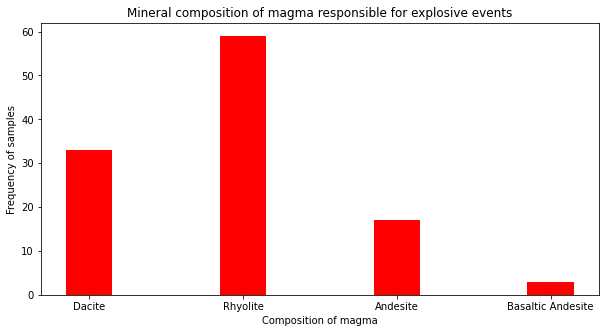

In [3]:
# From the frequency histograms, the following list of compositions can be created
# Bar chart for presenting

effMaterials = np.array(["Dacite","Rhyolite","Andesite","Basaltic Andesite","Obsidian"])
expMaterials = np.array(["Dacite","Rhyolite","Andesite","Basaltic Andesite"])
effFreq = np.array([51,45,34,2,1])
expFreq = np.array([33,59,17,3])

fig, ax = plt.subplots(figsize=(10,5))
plt.bar(effMaterials,effFreq,color='blue',width=0.3)
plt.title("Mineral composition of magma responsible for effusive events")
plt.xlabel("Composition of magma")
plt.ylabel("Frequency of samples")
plt.show()

fig, ax = plt.subplots(figsize=(10,5))
plt.bar(expMaterials,expFreq,color='red',width=0.3)
plt.title("Mineral composition of magma responsible for explosive events")
plt.xlabel("Composition of magma")
plt.ylabel("Frequency of samples")
plt.show()
# This data is obvoiusly non-normal as it represents sampling frequencies of very few samples

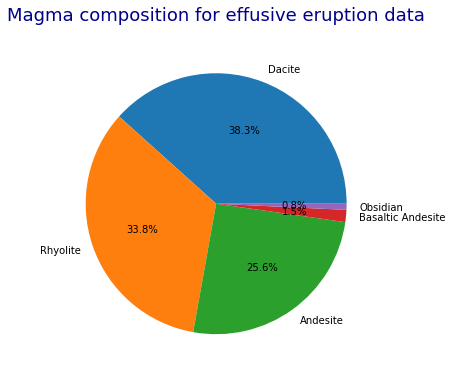

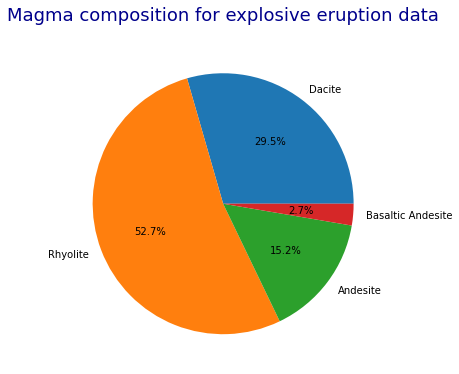

In [4]:
# Pie chart representation:
fig,ax = plt.subplots(figsize=(6,6))
plt.pie(effFreq,labels=effMaterials,autopct='%1.1f%%')
plt.title("Magma composition for effusive eruption data", pad=20, fontsize=18, color='darkblue')
plt.show()

fig,ax = plt.subplots(figsize=(6,6))
plt.pie(expFreq,labels=expMaterials,autopct='%1.1f%%')
plt.title("Magma composition for explosive eruption data", pad=20, fontsize=18, color='darkblue')
plt.show()

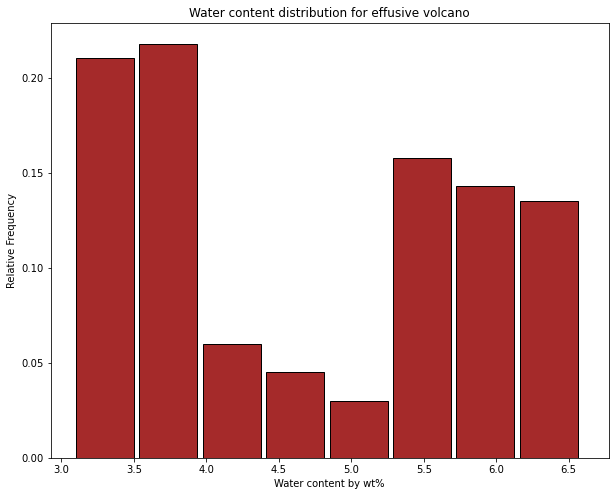

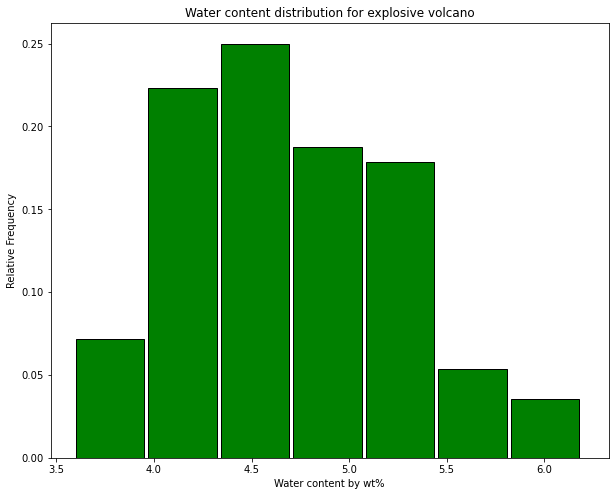

In [5]:
# Histogram for water content
fig, ax = plt.subplots(figsize=(10,8))
bin = 1 + np.log2(len(effWater))
ax.hist(effWater,bins=int(bin),width=0.4,color='brown',weights=np.ones_like(effWater)/len(effWater),edgecolor='black')
ax.set_title("Water content distribution for effusive volcano")
ax.set_xlabel("Water content by wt%")
ax.set_ylabel("Relative Frequency")
plt.show()

fig, ax = plt.subplots(figsize=(10,8))
bin = 1 + np.log2(len(expWater))
ax.hist(expWater,bins=int(bin),width=0.35,color='green',weights=np.ones_like(expWater)/len(expWater),edgecolor='black')
ax.set_title("Water content distribution for explosive volcano")
ax.set_xlabel("Water content by wt%")
ax.set_ylabel("Relative Frequency")
plt.show()

<h2><b><i>Normalcy test for data</i></b></h2>

A statistical significance of $\alpha = 0.05$ will be used for this test.

**Hypothesis $H_1$**: $Component$ of effusive volcano dataset is not normally distributed <br>
**Null hypothesis $H_0$** : $Component$ of effusive volcano dataset is normally distributed

Where
$$Component \in \{water\:content,crystallanity,storage\:temperature,SiO_2,TiO_2,Al_2O_3,FeO,MgO,CaO,Na_2O,K_2O\}$$

In other words the above null hypothesis will be tested for each individual component in the effusive dataset.

Similarly: <br>
**Hypothesis $H_1$**: $Component$ of explosive volcano dataset is not normally distributed <br>
**Null hypothesis $H_0$** : $Component$ of explosive volcano dataset is normally distributed

Where component refers to the same set of components in the explosive volcano dataset as in the effusive one.

In [6]:
# Testing data

dataLabels = ["water content","crystallanity","storage temperature","SiO2","TiO2","Al2O3","FeO","MgO","CaO","Na2O","K2O"]
effData = [effWater,effCrystallanity,effStorage_temp,effSiO2,effTiO2,effAl2O3,effFeO,effMgO,effCaO,effNa2O,effK2O]
expData = [expWater,expCrystallanity,expStorage_temp,expSiO2,expTiO2,expAl2O3,expFeO,expMgO,expCaO,expNa2O,expK2O]

# Test for normalcy:
# H1: Component of dataset is not normal
# H0: Component of dataset is normal with a confidence of 95%
# The above hypothesis and null hypothesis will be tested for all data components of effusve and explosive volcano datasets respectively 

for i in range(len(effData)):
    effTest, effP = stat.normaltest(effData[i])
    if effP > 0.05:
        print("The null hypothesis is accepted hence the effusive data for",dataLabels[i],"is distributed normally with a p value of",effP)
    else:
        print("The null hypothesis is rejected hence the effusive data for",dataLabels[i],"is not distributed normally with a p value of",effP)
    
    expTest, expP = stat.normaltest(expData[i])
    if expP > 0.05:
        print("The null hypothesis is accepted hence the explosive data for",dataLabels[i],"is distributed normally with a p value of",expP)
    else:
        print("The null hypothesis is accepted hence the explosive data for",dataLabels[i],"is not distributed normally with a p value of",expP)

The null hypothesis is rejected hence the effusive data for water content is not distributed normally with a p value of 0.0
The null hypothesis is accepted hence the explosive data for water content is distributed normally with a p value of 0.31015640505717623
The null hypothesis is rejected hence the effusive data for crystallanity is not distributed normally with a p value of 8.976110392270441e-10
The null hypothesis is accepted hence the explosive data for crystallanity is not distributed normally with a p value of 3.70138082878682e-05
The null hypothesis is rejected hence the effusive data for storage temperature is not distributed normally with a p value of 3.507865244619899e-10
The null hypothesis is accepted hence the explosive data for storage temperature is distributed normally with a p value of 0.2919620952248883
The null hypothesis is rejected hence the effusive data for SiO2 is not distributed normally with a p value of 1.109222162656737e-05
The null hypothesis is accepted 

**The null hypothesis is that both datasets are the same for all components of the datsets**

<h2><b><i>Testable features:</i></b></h2>

Again, using $\alpha = 0.05$

<table>
    <tr>
        <th>Distribution</th>
        <th>Variable</th>
        <th>Test to use</th>
        <th>Hypothesis</th>
        <th>Null hypothesis</th>
    </tr>
    <tr>
    <td>Non-normal</td>
    <td>Composition frequency</td>
    <td>Mann-Whitney Test</td>
    <td rowspan=12>Variable data is different for effusive and explosive volcano datasets</td>
    <td rowspan=12>Variable data is the same for effusive and explosive volcano datasets</td>
    </tr>
    <tr>
    <td>Both normal and non-normal</td>
    <td>Water content</td>
    <td>Mann-Whitney Test</td>
    </tr>
    <tr>
    <td>Non-normal</td>
    <td>Crystallinity</td>
    <td>Mann-Whitney Test</td>
    </tr>
    <tr>
    <td>Both normal and non-normal</td>
    <td>Storage temperature</td>
    <td>Mann-Whitney Test</td>
    </tr>
    <tr>
    <td>Both normal and non-normal</td>
    <td>SiO2</td>
    <td>Mann-Whitney Test</td>
    </tr>
    <tr>
    <td>Non-normal</td>
    <td>TiO2</td>
    <td>Mann-Whitney Test</td>
    </tr>
    <tr>
    <td>Non-normal</td>
    <td>Al2O3</td>
    <td>Mann-Whitney Test</td>
    </tr>
    <tr>
    <td>Non-normal</td>
    <td>FeO</td>
    <td>Mann-Whitney Test</td>
    </tr>
    <tr>
    <td>Non-normal</td>
    <td>MgO</td>
    <td>Mann-Whitney Test</td>
    </tr>
    <tr>
    <td>Non-normal</td>
    <td>CaO</td> 
    <td>Mann-Whitney Test</td>
    </tr>
    <tr>
    <td>Normal</td>
    <td>Na2O</td>
    <td>Independent two sample t-test</td>
    </tr>
    <tr>
    <td>Non-normal</td>
    <td>K2O</td>
    <td>Mann-Whitney Test</td>
    </tr>

In [7]:
# Non-Parametric comparision
np_dataLabels = ["frequency of composition","water content","crystallanity","storage temperature","Si02","Ti02","Al2O3","FeO","MgO","CaO","K2O"]
eff_np = [effFreq,effWater,effCrystallanity,effStorage_temp,effSiO2,effTiO2,effAl2O3,effFeO,effMgO,effCaO,effK2O]
exp_np = [expFreq,expWater,expCrystallanity,expStorage_temp,expSiO2,expTiO2,expAl2O3,expFeO,expMgO,expCaO,expK2O]

for i in range(len(eff_np)):
    mw_u, mw_p = stat.mannwhitneyu(eff_np[i], exp_np[i], alternative='two-sided')

    if mw_p < 0.05:
        print("Since p-value < 0.05, we can reject the null hypothesis; concluding there is a difference in {}".format(np_dataLabels[i]),"(pVal = {})".format(mw_p))
    else:
        print("Since p-value > 0.05, we accept the null hypothesis; concluding there is no difference in {}".format(np_dataLabels[i]),"(pVal = {})".format(mw_p))

Since p-value > 0.05, we accept the null hypothesis; concluding there is no difference in frequency of composition (pVal = 0.9047619047619049)
Since p-value > 0.05, we accept the null hypothesis; concluding there is no difference in water content (pVal = 0.6724546260702722)
Since p-value < 0.05, we can reject the null hypothesis; concluding there is a difference in crystallanity (pVal = 0.00021343189573624837)
Since p-value > 0.05, we accept the null hypothesis; concluding there is no difference in storage temperature (pVal = 0.8694581996241515)
Since p-value > 0.05, we accept the null hypothesis; concluding there is no difference in Si02 (pVal = 0.6524861376201445)
Since p-value > 0.05, we accept the null hypothesis; concluding there is no difference in Ti02 (pVal = 0.9727505527896932)
Since p-value > 0.05, we accept the null hypothesis; concluding there is no difference in Al2O3 (pVal = 0.8119058015682601)
Since p-value > 0.05, we accept the null hypothesis; concluding there is no di

In [8]:
#Parametric comparision
#The only parametric variable is Na2O

tStat, pVal = stat.ttest_ind(effNa2O,expNa2O)

if pVal < 0.05:
    print("Since p-value < 0.05, we can reject the null hypothesis; concluding there is a difference in Na2O","(pVal = {})".format(pVal))
else:
    print("Since p-value > 0.05, we accept the null hypothesis; concluding there is no difference in Na2O","(pVal = {})".format(pVal))

Since p-value > 0.05, we accept the null hypothesis; concluding there is no difference in Na2O (pVal = 0.15628852999011872)


So here we get that the crystallanity and $K_2O$ content are different for effusive and explosive volcano magma.

<h2><b><i>Data plots and analysis for K20 and crystallanity</i></b></h2>

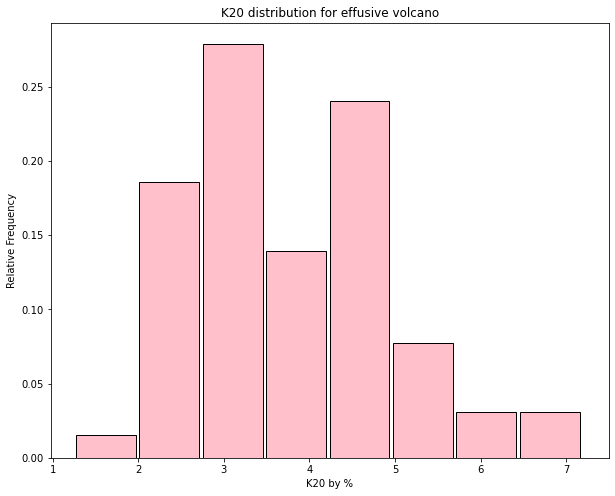

The mean of the distribution is 3.827596899224806
The variance of the distribution is 1.3687422871221682
The skew of the distribution is 0.532234788815214
The kurtosis of the distribution is 2.8554221836388978
The standard error in data is 0.10300682174753494


In [9]:
# Plot for effusive dataset
# K20

fig, ax = plt.subplots(figsize=(10,8))
bin = 1 + np.log2(len(effK2O))
ax.hist(effK2O,bins=int(bin),width=0.7,color='pink',weights=np.ones_like(effK2O)/len(effK2O),edgecolor='black')
ax.set_title("K20 distribution for effusive volcano")
ax.set_xlabel("K20 by %")
ax.set_ylabel("Relative Frequency")
plt.show()

#Moments of the distribution

print("The mean of the distribution is",np.mean(effK2O))
print("The variance of the distribution is",np.var(effK2O))
print("The skew of the distribution is",stat.skew(effK2O))
print("The kurtosis of the distribution is",stat.kurtosis(effK2O)+3)

#Error in the sample
print("The standard error in data is",np.sqrt(np.var(effK2O)/len(effK2O)))

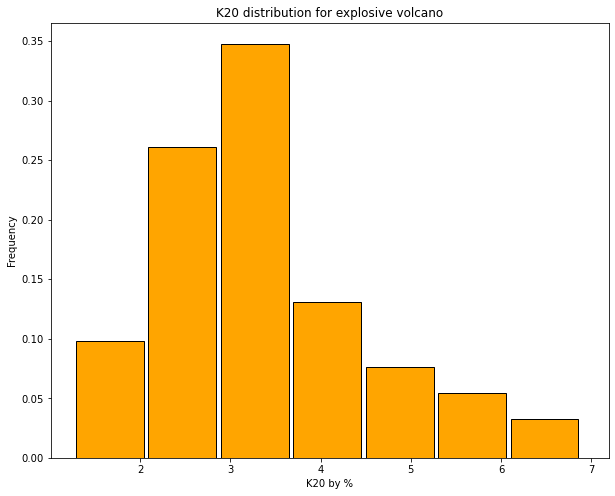

The mean of the distribution is 3.379021739130435
The variance of the distribution is 1.3142936082230623
The skew of the distribution is 0.8651195568011077
The kurtosis of the distribution is 3.6308038090933503
The standard error in data is 0.1195232198753912


In [10]:
# Plot for explosive dataset
# K20

fig, ax = plt.subplots(figsize=(10,8))
bin = 1 + np.log2(len(expK2O))
ax.hist(expK2O,bins=int(bin),width=0.75,color='orange',weights=np.ones_like(expK2O)/len(expK2O),edgecolor='black')
ax.set_title("K20 distribution for explosive volcano")
ax.set_xlabel("K20 by %")
ax.set_ylabel("Frequency")
plt.show()

print("The mean of the distribution is",np.mean(expK2O))
print("The variance of the distribution is",np.var(expK2O))
print("The skew of the distribution is",stat.skew(expK2O))
print("The kurtosis of the distribution is",stat.kurtosis(expK2O)+3)

#Error in the sample
print("The standard error in data is",np.sqrt(np.var(expK2O)/len(expK2O)))

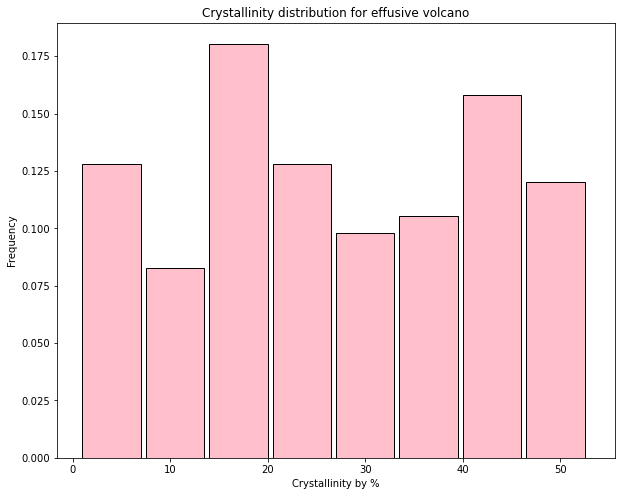

The mean of the distribution is 27.015037593984964
The variance of the distribution is 231.36819492339876
The skew of the distribution is 0.044570186234603404
The kurtosis of the distribution is 1.8423796033264583
The standard error in data is 1.3189429434762732


In [11]:
# Plot for effusive dataset
# Crystallanity

fig, ax = plt.subplots(figsize=(10,8))
bin = 1 + np.log2(len(effCrystallanity))
ax.hist(effCrystallanity,bins=int(bin),width=6,color='pink',weights=np.ones_like(effCrystallanity)/len(effCrystallanity),edgecolor='black')
ax.set_title("Crystallinity distribution for effusive volcano")
ax.set_xlabel("Crystallinity by %")
ax.set_ylabel("Frequency")
plt.show()

print("The mean of the distribution is",np.mean(effCrystallanity))
print("The variance of the distribution is",np.var(effCrystallanity))
print("The skew of the distribution is",stat.skew(effCrystallanity))
print("The kurtosis of the distribution is",stat.kurtosis(effCrystallanity)+3)

#Error in the sample
print("The standard error in data is",np.sqrt(np.var(effCrystallanity)/len(effCrystallanity)))

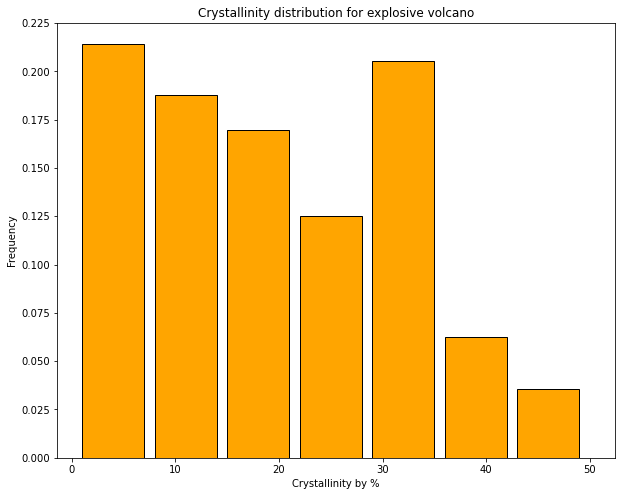

The mean of the distribution is 19.696428571428573
The variance of the distribution is 160.5864158163265
The skew of the distribution is 0.27864656047307323
The kurtosis of the distribution is 1.9654465677496047
The standard error in data is 1.1974169215750812


In [12]:
# Plot for explosive dataset
# Crystallanity

fig, ax = plt.subplots(figsize=(10,8))
bin = 1 + np.log2(len(expCrystallanity))
ax.hist(expCrystallanity,bins=int(bin),width=6,color='orange',weights=np.ones_like(expCrystallanity)/len(expCrystallanity),edgecolor='black')
ax.set_title("Crystallinity distribution for explosive volcano")
ax.set_xlabel("Crystallinity by %")
ax.set_ylabel("Frequency")
plt.show()

print("The mean of the distribution is",np.mean(expCrystallanity))
print("The variance of the distribution is",np.var(expCrystallanity))
print("The skew of the distribution is",stat.skew(expCrystallanity))
print("The kurtosis of the distribution is",stat.kurtosis(expCrystallanity)+3)

#Error in the sample
print("The standard error in data is",np.sqrt(np.var(expCrystallanity)/len(expCrystallanity)))

<h2><b><i>References</i></b></h2>

Popa, R.-G., Bachmann, O., &amp; Huber, C. (2021, September 30). Explosive or effusive style of volcanic eruption determined by magma storage conditions. Nature News. https://www.nature.com/articles/s41561-021-00827-9 

Eruption styles. British Geological Survey. (2023, March 3). https://www.bgs.ac.uk/discovering-geology/earth-hazards/volcanoes/eruption-styles 